In [19]:
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
digits.images.shape

(1797, 8, 8)

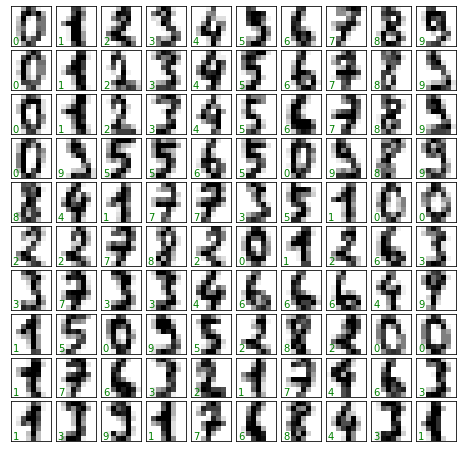

In [6]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8,8),
                         subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [8]:
X = digits.data
X.shape

(1797, 64)

In [9]:
y = digits.target
y.shape

(1797,)

In [10]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)

data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

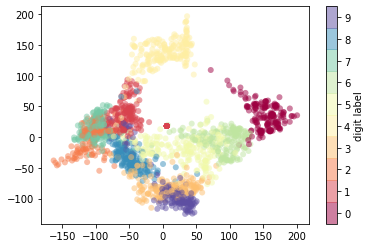

In [12]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
            c=digits.target, edgecolors='none', alpha=0.5,
           cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

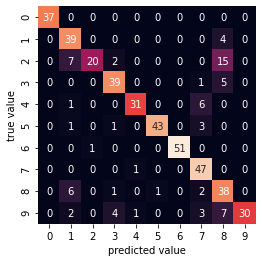

In [24]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

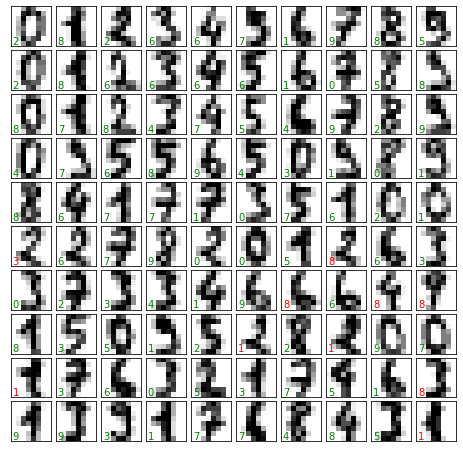

In [27]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')